In [84]:
#Import and preparation of data
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import datetime as df
import time
%matplotlib inline 

z = zipfile.ZipFile('../input/train.csv.zip')
train = pd.read_csv(z.open('train.csv'), parse_dates=['Dates'])

#On sample only : remove #
#train = train.head()

#Add year, week and hour data
train['Year'] = train['Dates'].map(lambda x: x.year)
train['Month'] = train['Dates'].map(lambda x: x.month)
train['Day'] = train['Dates'].map(lambda x: x.day)
train['DayOfYear'] = train['Dates'].map(lambda x: x.strftime("%m-%d"))
train['Hour'] = train['Dates'].map(lambda x: x.hour)

#Remove lines with NAN
train.dropna()

#Display of 10 first lines to show the structure
train.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Year  Month  Day DayOfYear  Hour  
0 -122.425892  37.774599  2015      5   13     05-13    23  
1 -122.425892  37.774599  2015      5   13     05-13    23  
2 -122.424363  37.800414  2015      5   13     05-13    23  
3 -122.426995  37.800873  2015      5   13     05-13    23  
4 -122.438738  37.771541  2015      5   13     05-13    23

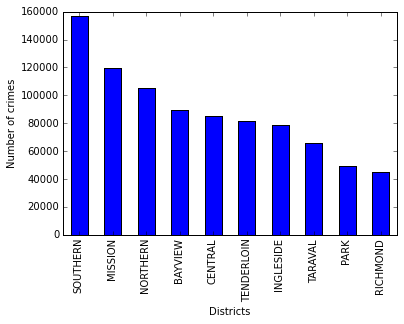

In [85]:
#Number of crimes per district
train.PdDistrict.value_counts().plot(kind='bar')
plt.ylabel('Number of crimes')
plt.xlabel('Districts')
plt.show()


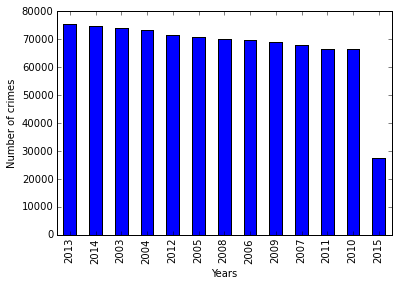

In [10]:
#Number of crimes per year
train.Year.value_counts().plot(kind='bar')
plt.ylabel('Number of crimes')
plt.xlabel('Years')
plt.show()

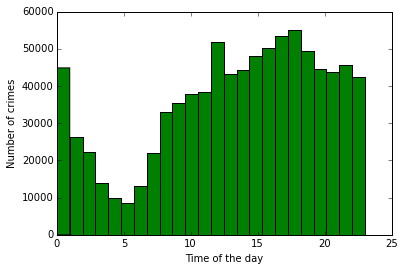

In [24]:
#Number of crimes per time of the day
plt.hist(train['Hour'],bins=24,color='g')
plt.ylabel('Number of crimes')
plt.xlabel('Time of the day')
plt.show()

Category    Day of the year with minimum crimes is 04-11
dtype: object
Category    Day of the year with maximum crimes is 11-01
dtype: object


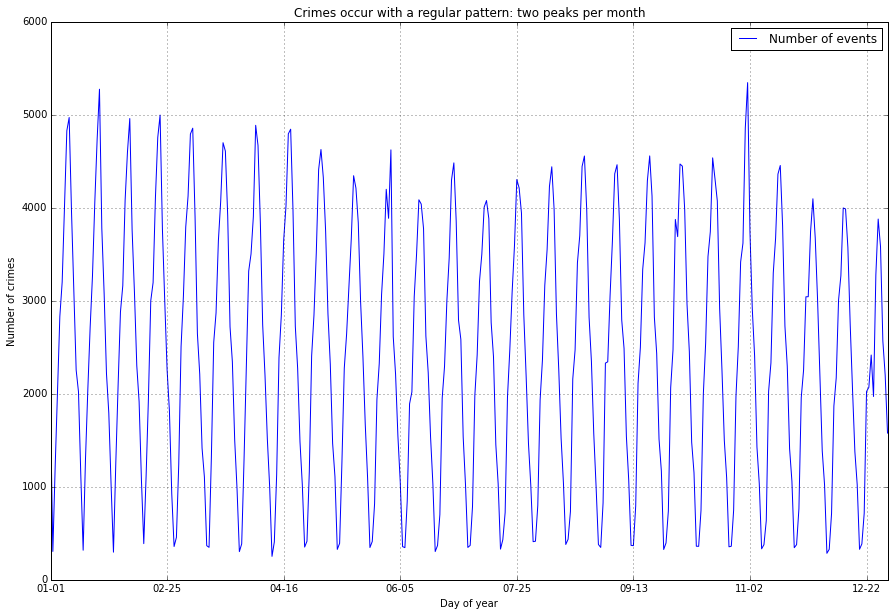

In [120]:
df = train[['Category','DayOfYear']].groupby(['DayOfYear']).count()
print "Day of the year with minimum crimes is " + df.idxmin() 
print "Day of the year with maximum crimes is " + df.idxmax()

df.plot(y='Category', label='Number of events', figsize=(15,10)) 
plt.title("Crimes occur with a regular pattern: two peaks per month")
plt.ylabel('Number of crimes')
plt.xlabel('Day of year')
plt.grid(True)
plt.show()

In [4]:
#List of categories
catunique = list(set(train['Category']))
print catunique

['KIDNAPPING', 'WEAPON LAWS', 'SECONDARY CODES', 'WARRANTS', 'PROSTITUTION', 'EMBEZZLEMENT', 'LOITERING', 'SUICIDE', 'DRIVING UNDER THE INFLUENCE', 'SEX OFFENSES FORCIBLE', 'ROBBERY', 'BURGLARY', 'SUSPICIOUS OCC', 'FAMILY OFFENSES', 'BRIBERY', 'FORGERY/COUNTERFEITING', 'BAD CHECKS', 'DRUNKENNESS', 'GAMBLING', 'OTHER OFFENSES', 'RECOVERED VEHICLE', 'FRAUD', 'ARSON', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'NON-CRIMINAL', 'EXTORTION', 'PORNOGRAPHY/OBSCENE MAT', 'LIQUOR LAWS', 'SEX OFFENSES NON FORCIBLE', 'TREA', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'ASSAULT', 'MISSING PERSON', 'DISORDERLY CONDUCT', 'RUNAWAY']


KIDNAPPING


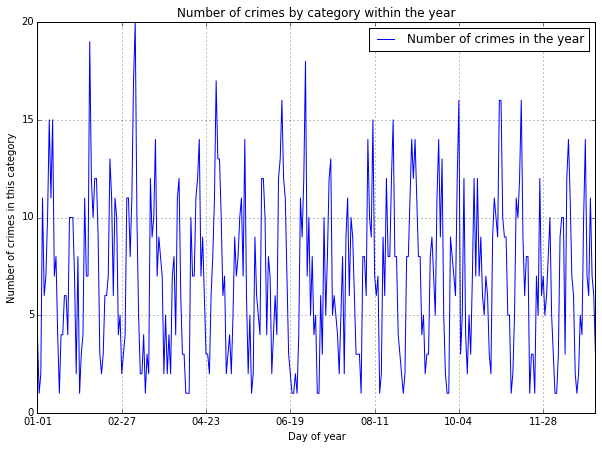

WEAPON LAWS


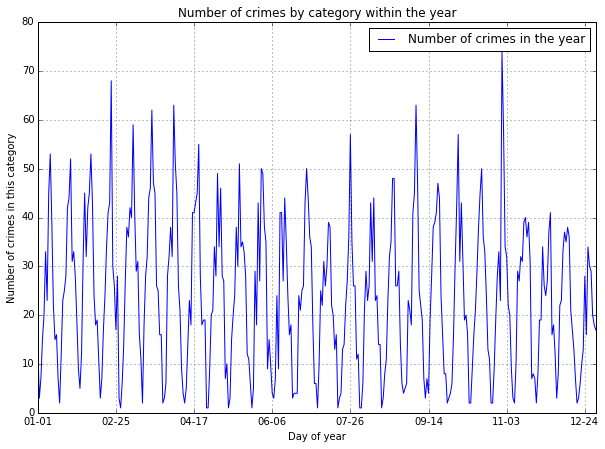

SECONDARY CODES


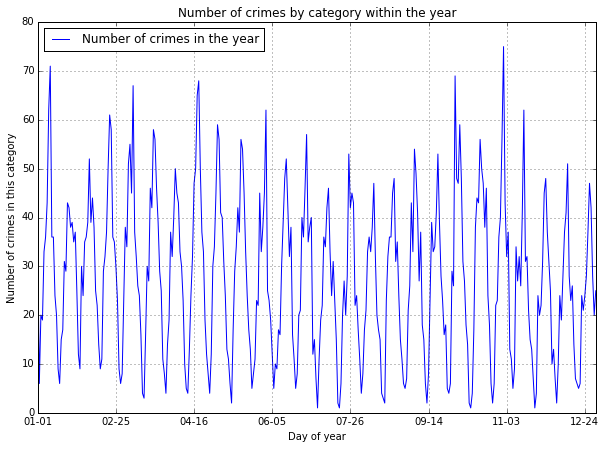

WARRANTS


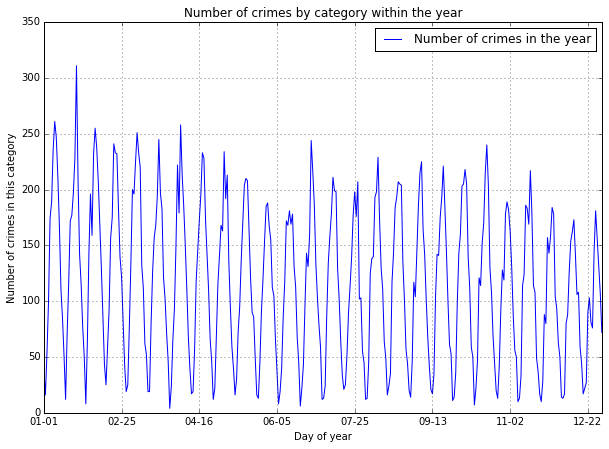

PROSTITUTION


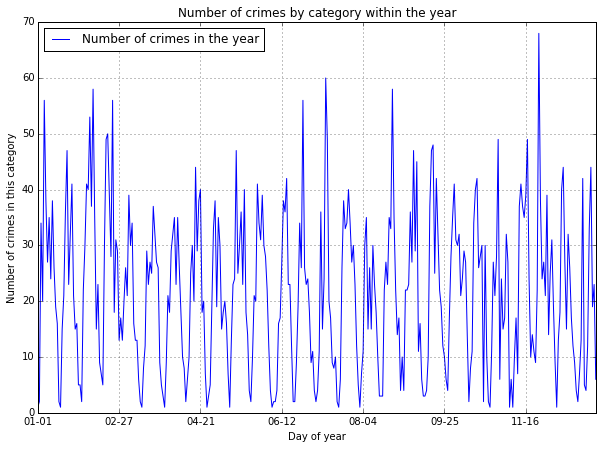

EMBEZZLEMENT


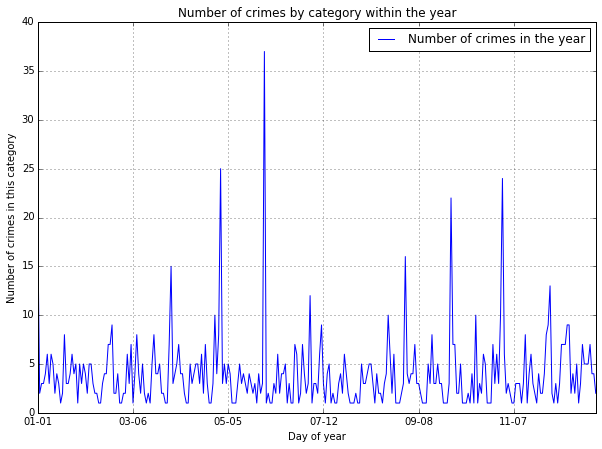

LOITERING


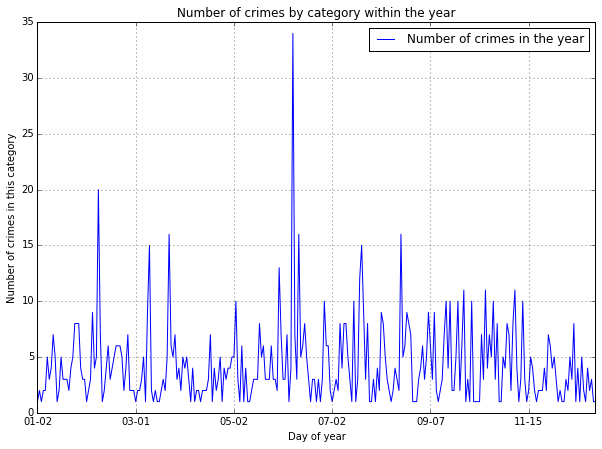

SUICIDE


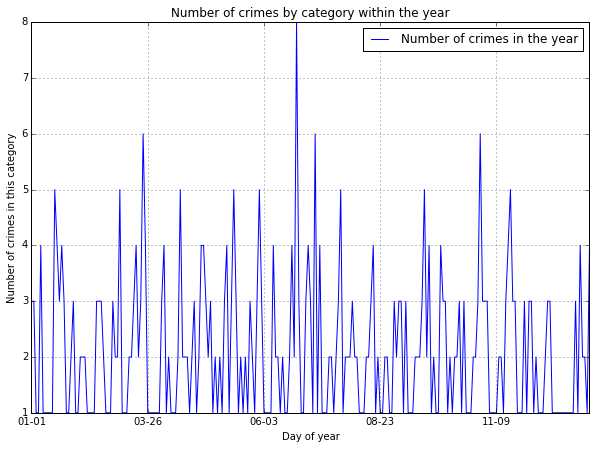

DRIVING UNDER THE INFLUENCE


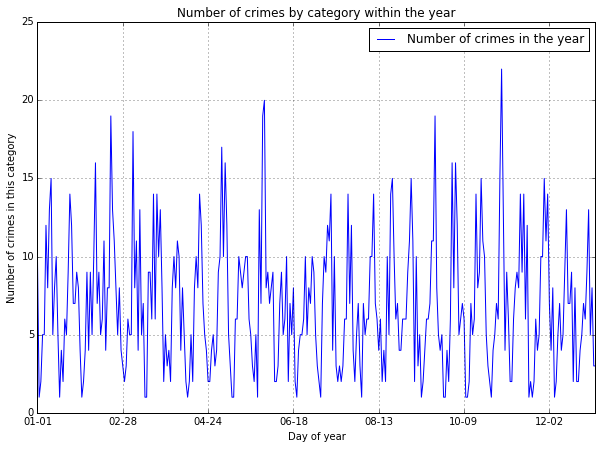

SEX OFFENSES FORCIBLE


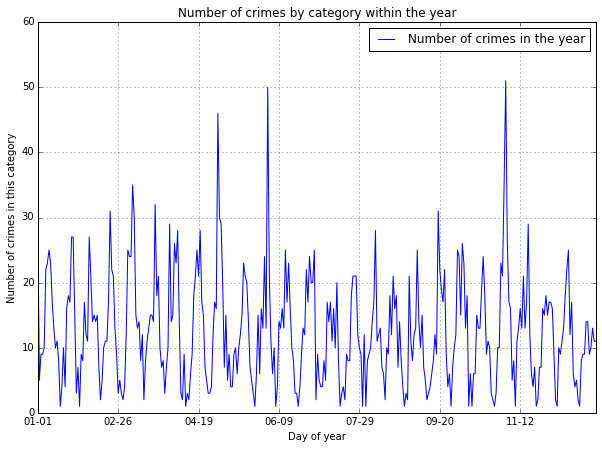

ROBBERY


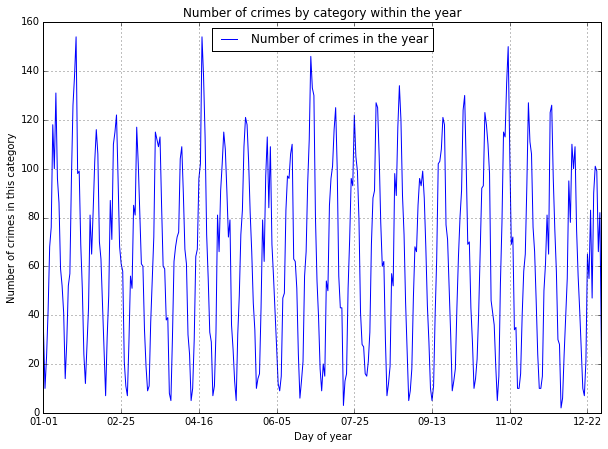

BURGLARY


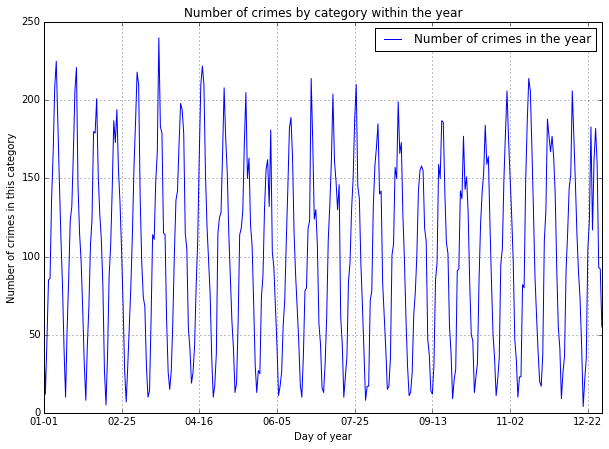

SUSPICIOUS OCC


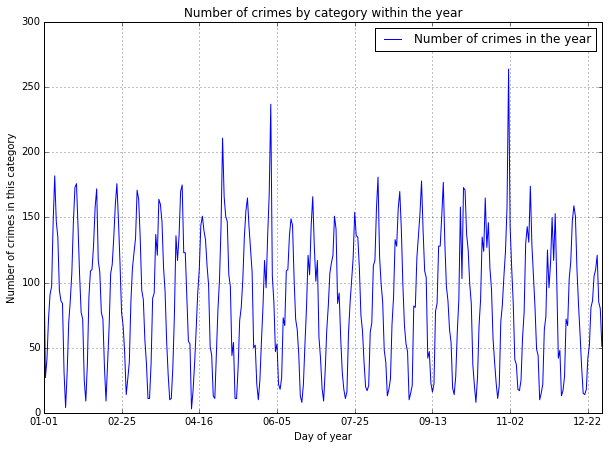

FAMILY OFFENSES


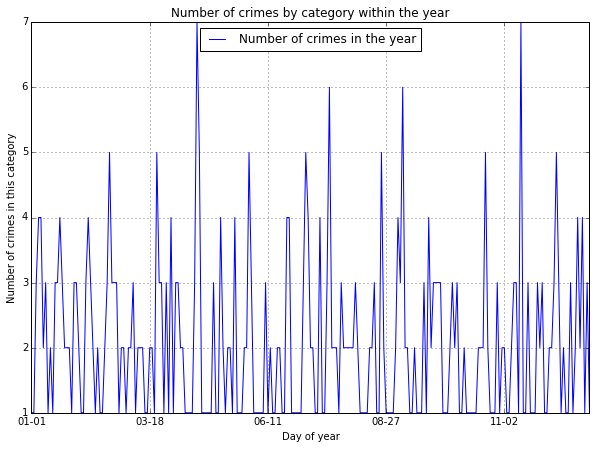

BRIBERY


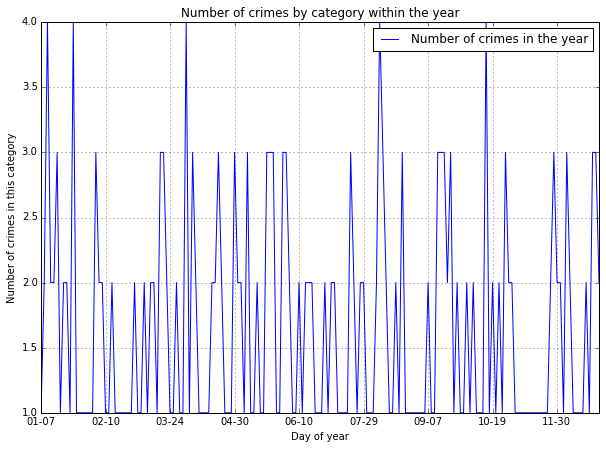

FORGERY/COUNTERFEITING


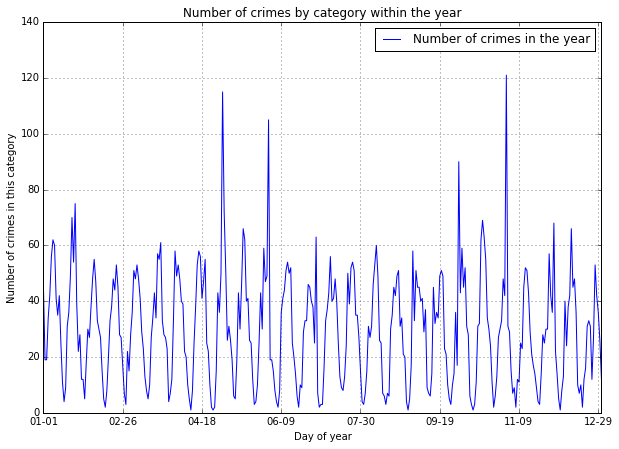

BAD CHECKS


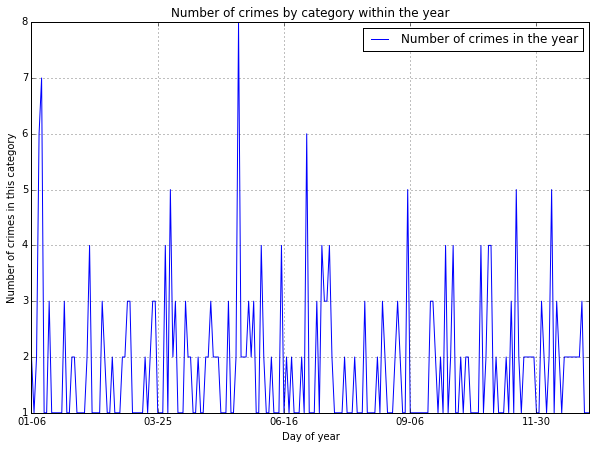

DRUNKENNESS


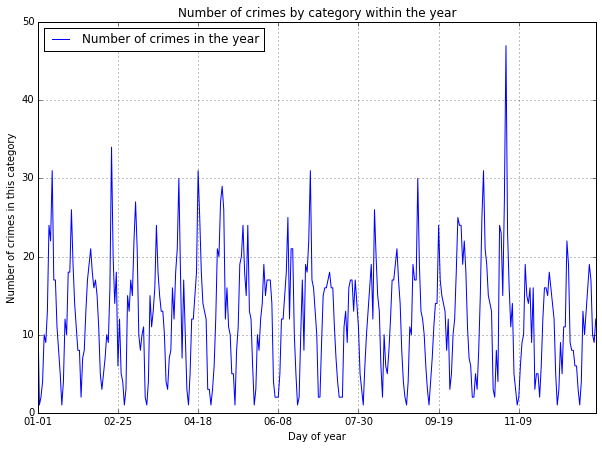

GAMBLING


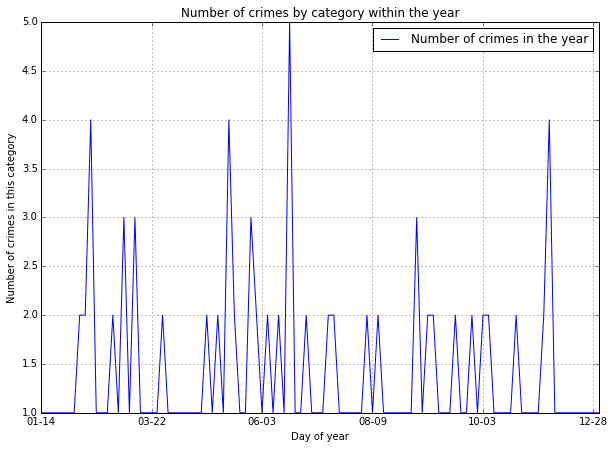

OTHER OFFENSES


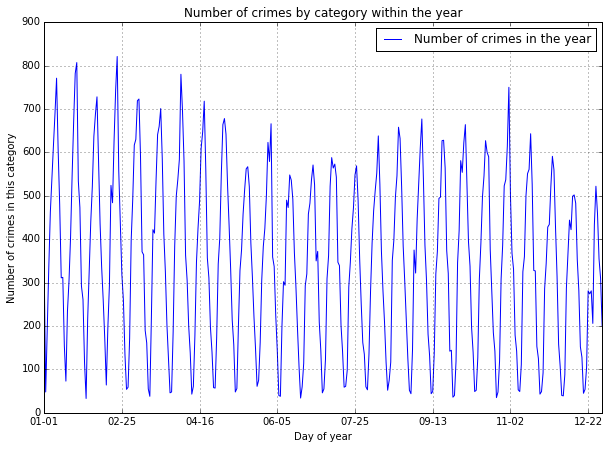

RECOVERED VEHICLE


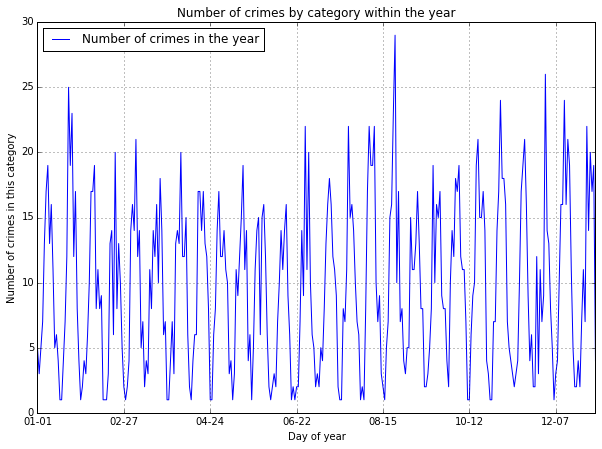

FRAUD


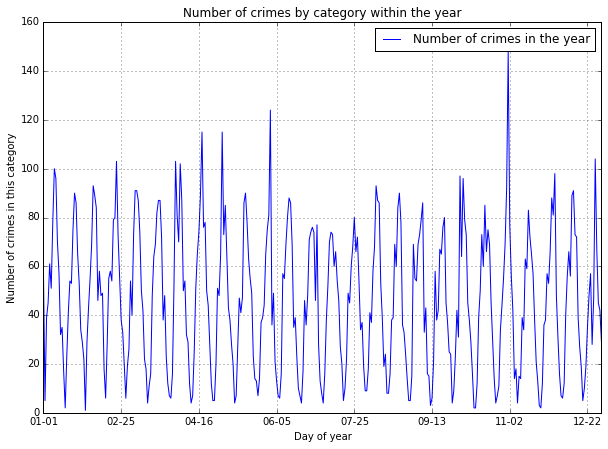

ARSON


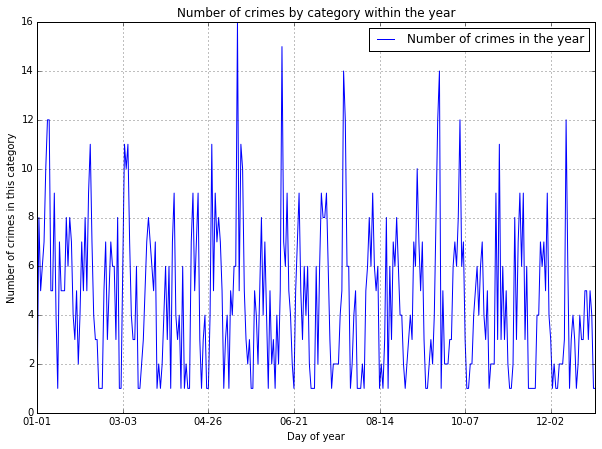

DRUG/NARCOTIC


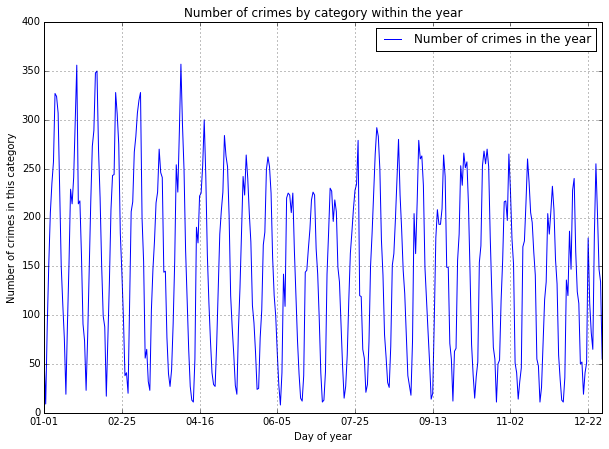

TRESPASS


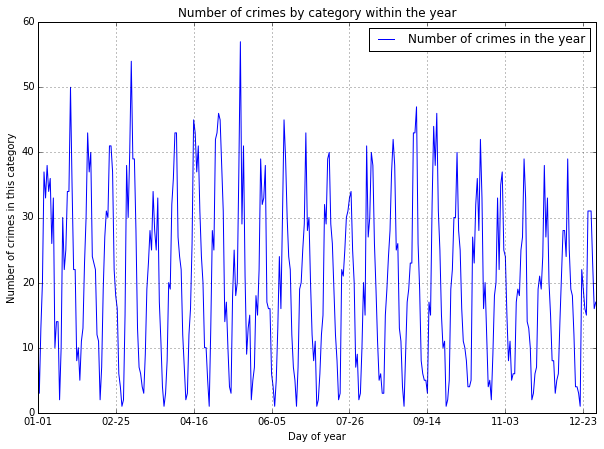

LARCENY/THEFT


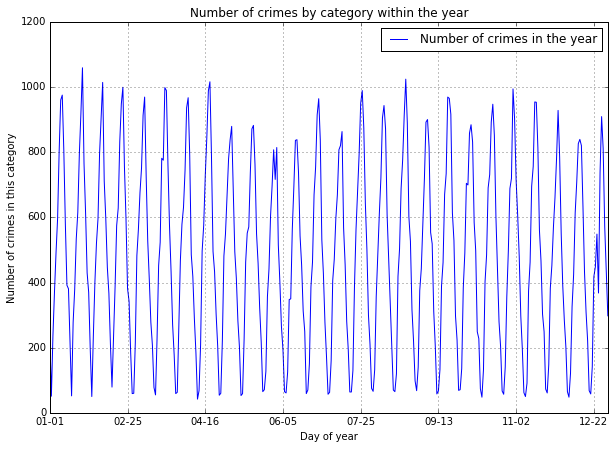

VANDALISM


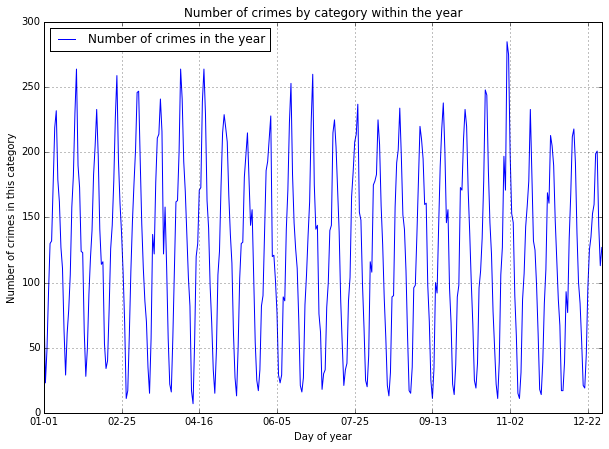

NON-CRIMINAL


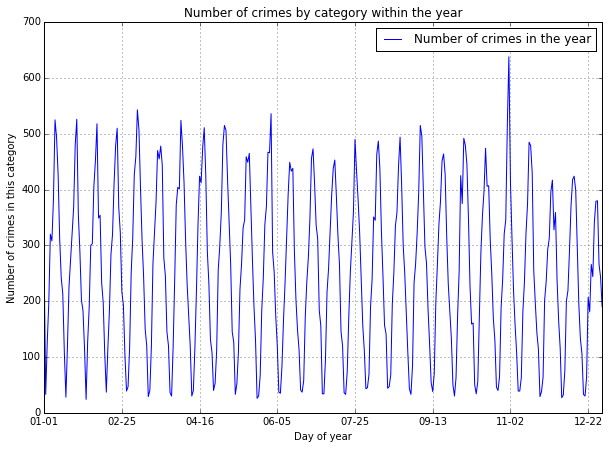

EXTORTION


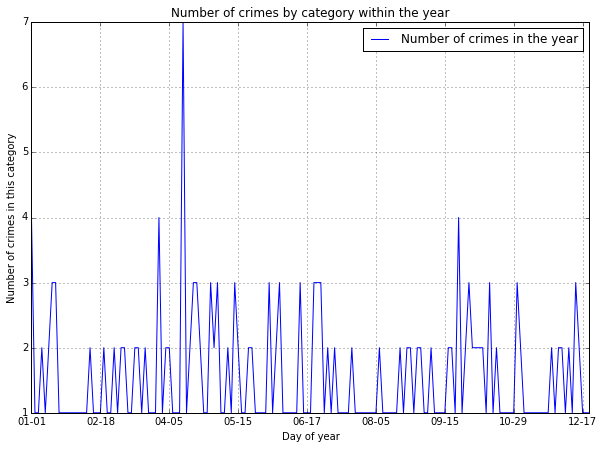

PORNOGRAPHY/OBSCENE MAT


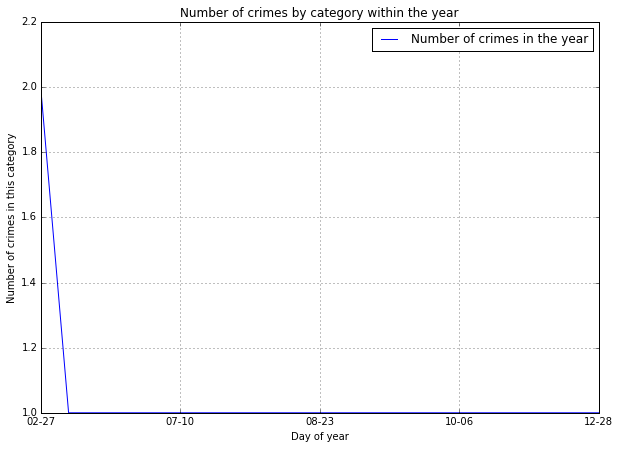

LIQUOR LAWS


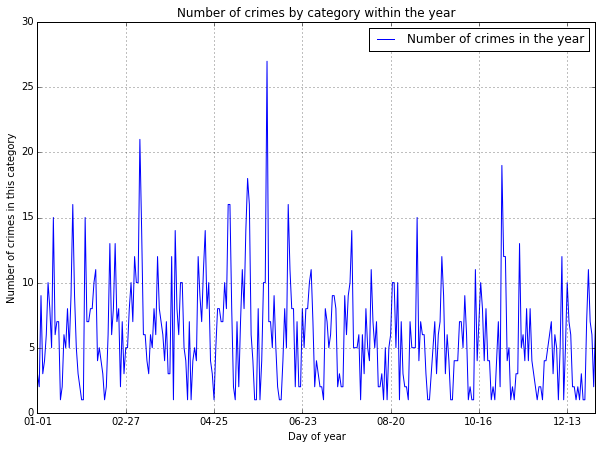

SEX OFFENSES NON FORCIBLE


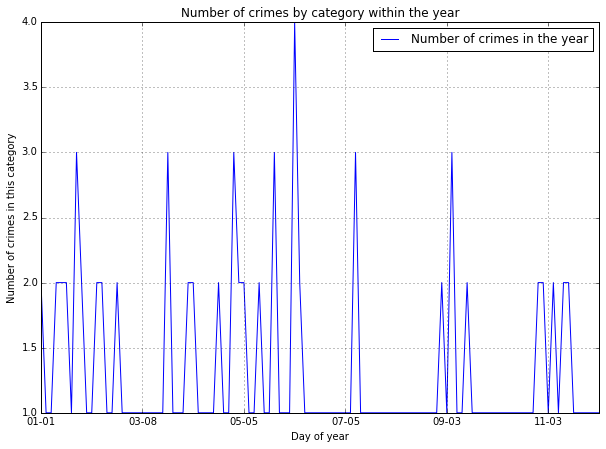

TREA


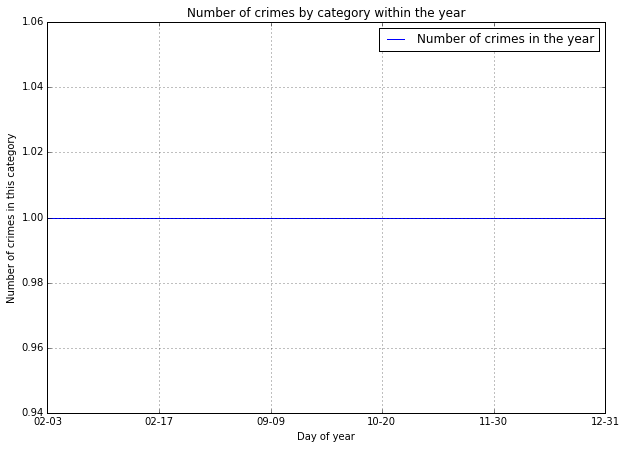

VEHICLE THEFT


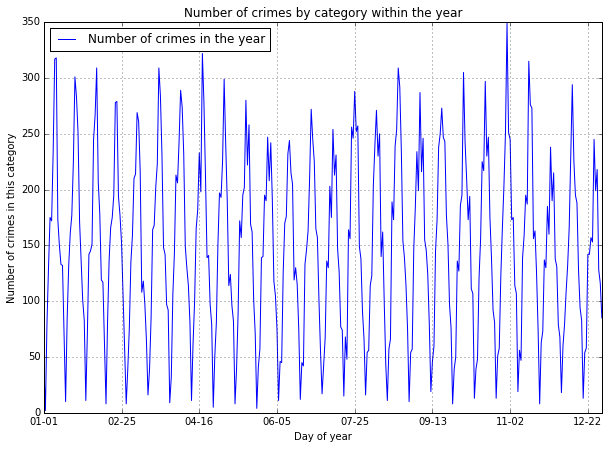

STOLEN PROPERTY


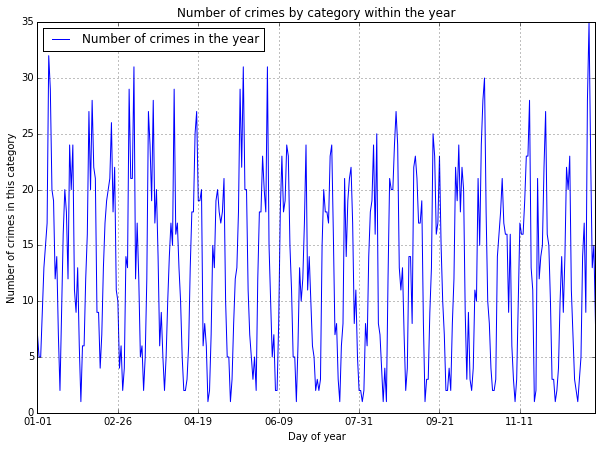

ASSAULT


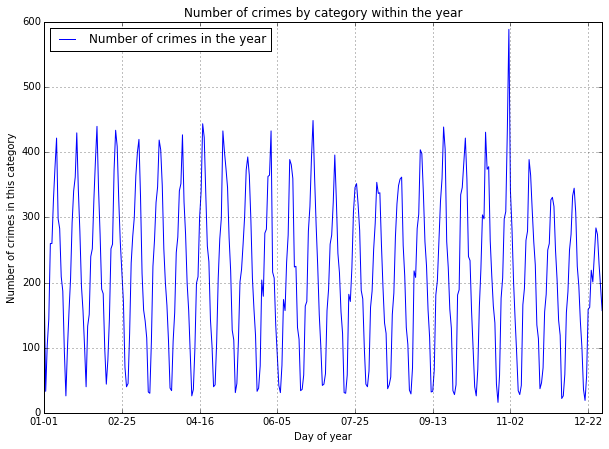

MISSING PERSON


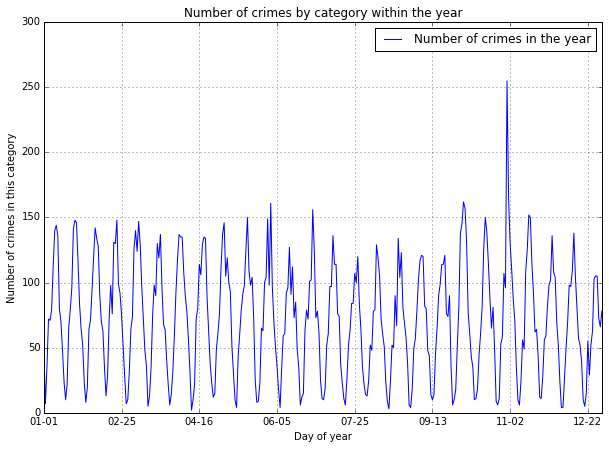

DISORDERLY CONDUCT


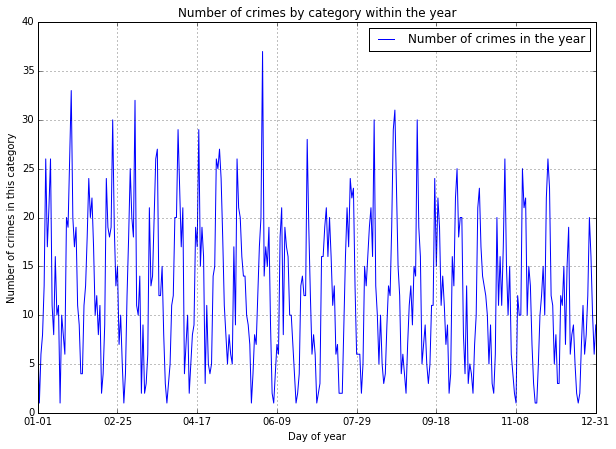

RUNAWAY


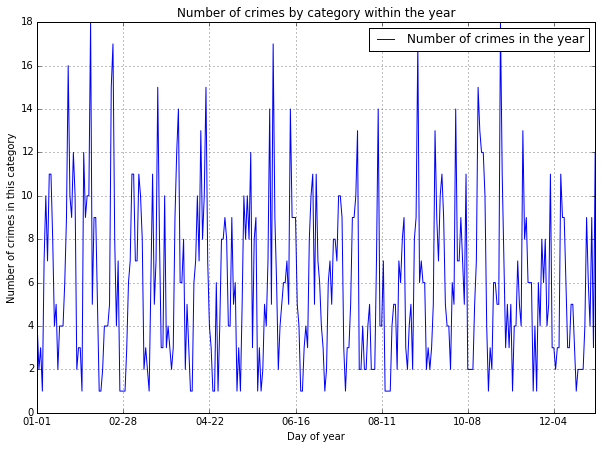

In [7]:
for cat in catunique:
    print cat
    traincat = train[train.Category == cat]
    df = traincat[['Category','DayOfYear']].groupby(['DayOfYear']).count()
    df.plot(y='Category', label='Number of crimes in the year', figsize=(10,7)) 
    plt.title("Number of crimes by category within the year")
    plt.ylabel('Number of crimes in this category')
    plt.xlabel('Day of year')
    plt.grid(True)
    plt.show()

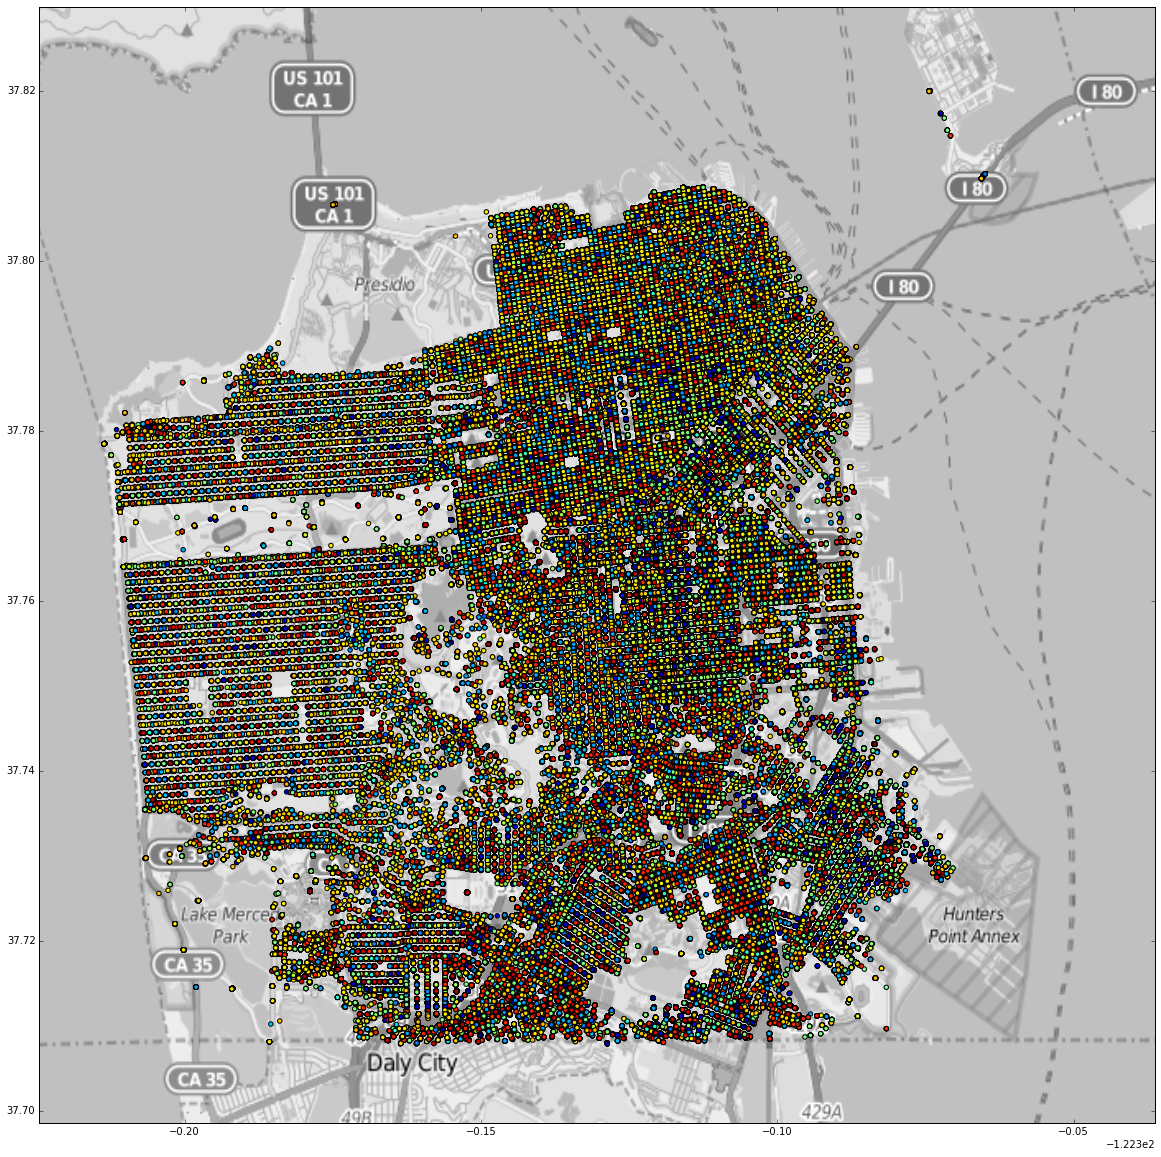

In [114]:
#Map of all crimes with categories in different colors

mapdata = np.loadtxt("../input/sf_map_copyright_openstreetmap_contributors.txt")
#    ll.lon     ll.lat   ur.lon     ur.lat
#    -122.52469 37.69862 -122.33663 37.82986
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(mapdata, cmap = plt.get_cmap('gray'), extent=[-122.52469,-122.33633,37.69862,37.82986], aspect='auto')

cats = list(set(train['Category']))
trans = {}
for i in range(len(cats)):
    trans[cats[i]]=i
cati = []
for i in train['Category']:
    cati.append(trans[i])

    ax.scatter(train['X'],train['Y'],marker='o',c=cati)
ax.set_xlim(-122.52469,-122.33633)
ax.set_ylim(37.69862,37.82986)
plt.show()

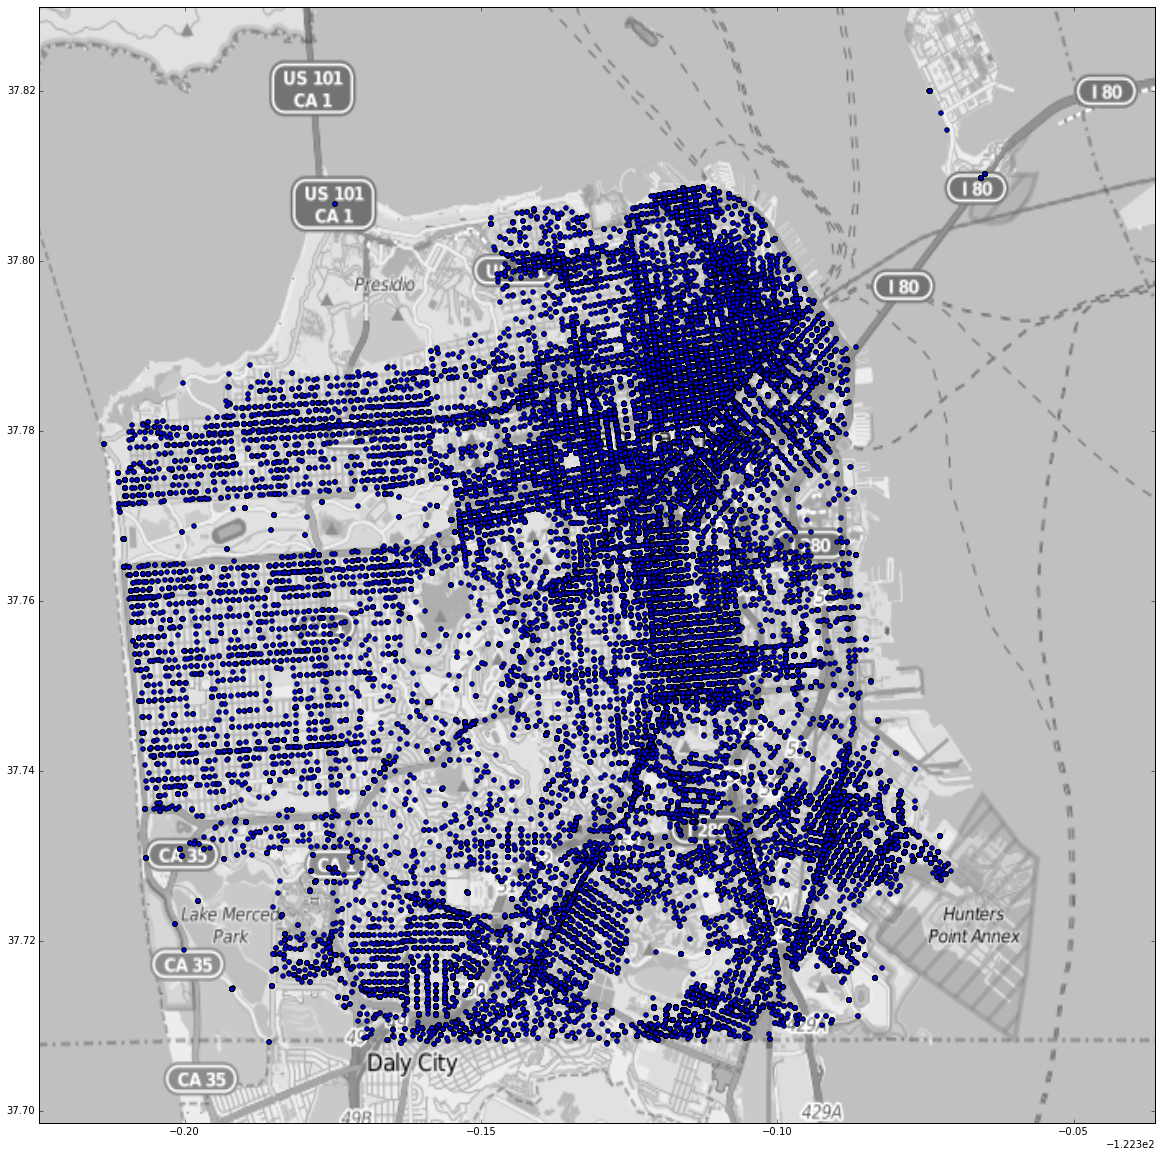

In [116]:
#Map of assaults

mapdata = np.loadtxt("../input/sf_map_copyright_openstreetmap_contributors.txt")
#    ll.lon     ll.lat   ur.lon     ur.lat
#    -122.52469 37.69862 -122.33663 37.82986
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(mapdata, cmap = plt.get_cmap('gray'), extent=[-122.52469,-122.33633,37.69862,37.82986], aspect='auto')

df = train[train.Category == 'ASSAULT']

ax.scatter(df['X'],df['Y'],marker='o')
ax.set_xlim(-122.52469,-122.33633)
ax.set_ylim(37.69862,37.82986)
plt.show()